# Kiểm tra Thực Hành 1

## THÔNG TIN

- Họ tên: Thân Hoàng Thiên Thiên
- MSV: 22687721
- Ngày thi: 25/09/2024


## Đề bài:


## Mô tả dữ liệu `penguins` (Seaborn built-in)

Dataset **`penguins`** được thu thập tại quần đảo **Palmer Archipelago (Nam Cực)**, cung cấp thông tin sinh học về 3 loài chim cánh cụt khác nhau:

* **Adelie**
* **Chinstrap**
* **Gentoo**

Các biến trong dataset gồm:

* `species`: Loài chim (categorical)
* `island`: Đảo sống (categorical, gồm: Biscoe, Dream, Torgersen)
* `sex`: Giới tính (categorical: Male/Female, có thể có giá trị thiếu)
* `bill_length_mm`: Chiều dài mỏ (numerical, mm)
* `bill_depth_mm`: Độ sâu mỏ (numerical, mm)
* `flipper_length_mm`: Chiều dài vây (numerical, mm)
* `body_mass_g`: Khối lượng cơ thể (numerical, g)



---

## Câu hỏi

### A. Hiểu dữ liệu (2 điểm)

1. Đọc dữ liệu dataset `penguins` từ thư viện seaborn. 

- Hiển thị 10 dòng đầu tiên.
- Có bao nhiêu quan sát và bao nhiêu biến?
- Dữ liệu có giá trị trống không?

*Hướng dẫn:* sử dụng hàm `sns.load_dataset('penguins')`


In [4]:
# YOUR ANSWER HERE
# Doc du lieu
penguins = sns.load_dataset("penguins")
# 10 dong dau tien
print(penguins.head(10))
#Kich thuoc dataset
print("Kich thuoc dataset:", penguins.shape)
#Kiem tra du lieu trong
print("Co gia tri trong khong?")
print(penguins.isnull().sum())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

In [2]:
import seaborn as sns
import pandas as pd

2. Có bao nhiêu loài chim (`species`) được ghi nhận trong dataset? Kể tên chúng.


In [5]:
# YOUR ANSWER HERE
species_list = penguins["species"].unique()
print("Cac loai chim:",species_list)
print("So loai:", len(species_list))

Cac loai chim: ['Adelie' 'Chinstrap' 'Gentoo']
So loai: 3



---

### B Chọn dữ liệu ( 3 điểm)

3. Chọn ra tất cả các cá thể sống ở đảo **Dream**. Số lượng là bao nhiêu?


In [6]:
# YOUR ANSWER HERE
dream_penguins = penguins[penguins["island"]== "Dream"]
print("So luong ca the o dao Dream:", dream_penguins.shape[0])

So luong ca the o dao Dream: 124


4. Tạo tập con chỉ gồm 2 biến: `bill_length_mm` và `bill_depth_mm`. Dataset này có kích thước bao nhiêu?


In [7]:
# YOUR ANSWER HERE
subset = penguins[["bill_length_mm","bill_depth_mm"]]
print(subset.head())
#Kich thuoc dataset moi
print("Kich thuoc tap con:", subset.shape)

   bill_length_mm  bill_depth_mm
0            39.1           18.7
1            39.5           17.4
2            40.3           18.0
3             NaN            NaN
4            36.7           19.3
Kich thuoc tap con: (344, 2)


5. Tính trung bình `body_mass_g` cho từng loài chim.


In [8]:
# YOUR ANSWER HERE
avg_body_mass= penguins.groupby("species")["body_mass_g"].mean()
print("Trung binh body_mass_g cho tung loai chim la:")
print(avg_body_mass)

Trung binh body_mass_g cho tung loai chim la:
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


6. Tính trung bình **theo từng cặp (species, sex)** cho biến `flipper_length_mm`. Có bao nhiêu cặp bị thiếu dữ liệu giới tính, và điều đó ảnh hưởng thế nào đến việc tính toán?



In [9]:
# YOUR ANSWER HERE
#Tính trung bình **theo từng cặp (species, sex)** cho biến `flipper_length_mm`
avg_flipper = penguins.groupby(["species","sex"])["flipper_length_mm"].mean()
print(avg_flipper)
#Kiem tra so luong bi thieu sex
missing_sex = penguins["sex"].isnull().sum()
print("So quan sat thieu du lieu gioi tinh:", missing_sex)
# Dieu do anh huong the nao den tinh toan?
print("Cac nhom sex bi thieu:")
print(penguins[penguins["sex"].isnull()]["species"].value_counts())

species    sex   
Adelie     Female    187.794521
           Male      192.410959
Chinstrap  Female    191.735294
           Male      199.911765
Gentoo     Female    212.706897
           Male      221.540984
Name: flipper_length_mm, dtype: float64
So quan sat thieu du lieu gioi tinh: 11
Cac nhom sex bi thieu:
Adelie    6
Gentoo    5
Name: species, dtype: int64


7. Lập bảng so sánh trung bình và độ lệch chuẩn thuộc tính `body_mass_g` giữa các loài chim

In [10]:
# YOUR ANSWER HERE
stats_body_mass = penguins.groupby("species")["body_mass_g"].agg(["mean","std"])
print("Bang trung binh va do lech chuan body_mass_g theo tung loai:")
print(stats_body_mass)


Bang trung binh va do lech chuan body_mass_g theo tung loai:
                  mean         std
species                           
Adelie     3700.662252  458.566126
Chinstrap  3733.088235  384.335081
Gentoo     5076.016260  504.116237


8. Thống kê số lượng những loại chim cánh cụt khác nhau trên đảo `Dream`

In [12]:
# YOUR ANSWER HERE
dream_counts = penguins[penguins["island"]=="Dream"]["species"].value_counts()
print("So luong cac loai chim tren dao Dream :")
print(dream_counts)

So luong cac loai chim tren dao Dream :
Chinstrap    68
Adelie       56
Name: species, dtype: int64


---

### C. Trực quan hóa (3 điểm)

9. Vẽ histogram cho biến `bill_length_mm`. Nhận xét phân phối dữ liệu.


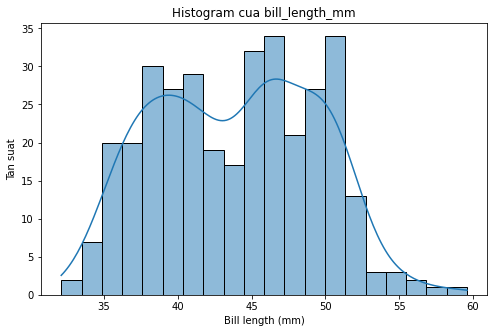

In [14]:
# YOUR ANSWER HERE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(penguins["bill_length_mm"], bins=20, kde=True)
plt.title("Histogram cua bill_length_mm")
plt.xlabel("Bill length (mm)")
plt.ylabel("Tan suat")
plt.show()

Phân phối bill_length_mm thường khá chuẩn nhung có sự chồng lấn giữa các loài khác nhau nên tạo ra vài đỉnh

10. Vẽ boxplot so sánh `flipper_length_mm` giữa các loài (`species`). Nhận xét sự khác biệt.


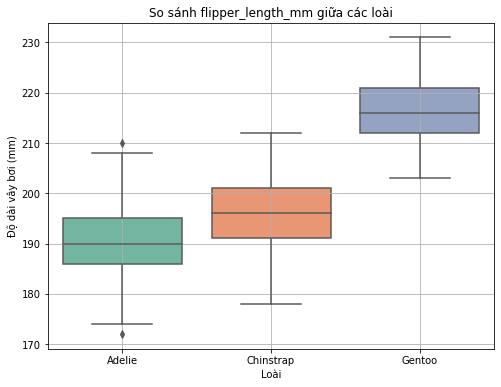

In [15]:
# YOUR ANSWER HERE
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', palette='Set2')
plt.title('So sánh flipper_length_mm giữa các loài')
plt.xlabel('Loài')
plt.ylabel('Độ dài vây bơi (mm)')
plt.grid(True)
plt.show()

Gentoo: có vây bơi dài nhất( trung bình 220-230mm ), độ dao động cũng cao
Adelie: có vây bơi ngắn nhất( trung bình 190mm) 
Chinstrap:nằm giữa 2 loài trên với trung bình khoảng 200mm
Khoảng giá trị giữa 3 loài không trùng nhiều, vì vậy cần đo chiều dài vây bơi cũng có thể phân biệt các loại

11. Vẽ violinplot biểu diễn phân phối `body_mass_g` theo biến `sex` **cho từng loài** (sử dụng `hue`). Bạn quan sát thấy sự khác biệt nào nổi bật giữa **male** và **female** ở mỗi loài?



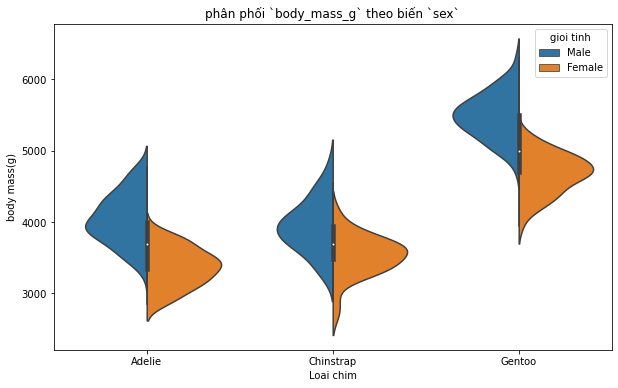

In [16]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.violinplot(data=penguins, x="species",y="body_mass_g",hue="sex", split=True)
plt.title('phân phối `body_mass_g` theo biến `sex`')
plt.xlabel('Loai chim')
plt.ylabel("body mass(g)")
plt.legend(title="gioi tinh")
plt.show()


Ở 3 loài chim đực(male) đều có khối lượng cơ thể cao hơn so với chim cái(female. Sự khác biệt rõ ở loài Gentoo: chim đực nặng hơn hẳn chim cái. Ở 2 loài kia sự khác biệt vẫn tồn tại nhưng khoảng cách nhỏ hơn. Vì vậy giới tính là yếu tố phân biệt body mass rõ ở cả 3 loài

---

### D. Suy luận (2 điểm)

12. Vẽ scatterplot giữa `bill_length_mm` và `bill_depth_mm`, bạn có thể suy luận gì về đặc trưng mỏ giữa các loài chim?


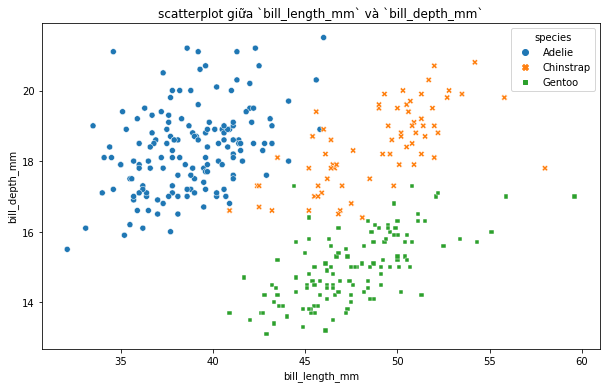

In [17]:
# YOUR ANSWER HERE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x="bill_length_mm",y="bill_depth_mm",hue="species", style="species")
plt.title("scatterplot giữa `bill_length_mm` và `bill_depth_mm`")
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.show()


---

Adelie: mỏ ngắn nhưng sâu-> điểm tập trung ở vùng bill_length thấp và bill_depth cao
Gentoo: mỏ dài nhưng nông-> nằm ở vùng bill_length cao và bill_depth thấp
Chinstrap: mỏ dài và sâu-> nằm ở khoảng giữa thiên về bill_length lớn
Vì vậy chỉ dựa vào chiều dài và chiều sâu mỏ có thể phân biệt được phần lớn các loài chim cánh cụt